#### Student Name: Mai Ngo
#### Course Name and Number: DSC 478 Programming Machine Learning Applications
#### Assignment 4
#### Date: 6/4/2023

### Part A. Recommender system.

For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.

The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.

Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):

#### a. Load in the joke ratings data and the joke text data into appropriate data structures.

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jokeRating = pd.read_csv('modified_jester_data.csv', header=None)
print (f"Data shape: {jokeRating.shape}")
jokeRating.head(10)
#Read data as Pandas dataframe and get number of rows and columns, print first 10 observations.

Data shape: (1000, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
5,4.83,7.46,11.44,2.50,3.91,6.68,2.31,10.13,4.35,9.20,...,7.46,4.11,10.32,8.04,8.82,7.65,11.05,1.92,5.95,7.55
6,0.00,0.00,0.00,0.00,19.59,1.15,18.72,19.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.00,0.00,0.00
7,17.84,14.16,20.17,4.79,2.84,9.30,20.27,12.41,5.81,6.58,...,18.23,9.88,10.90,5.32,7.84,7.65,13.14,10.95,12.31,11.00
8,7.21,7.46,1.58,4.11,2.26,10.71,5.71,2.07,3.14,9.40,...,15.37,10.71,15.17,10.71,10.71,10.71,10.71,10.71,7.60,6.05
9,14.01,16.15,16.15,14.01,17.41,16.15,19.93,13.52,14.01,19.16,...,0.00,15.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
jokeText = np.genfromtxt("jokes.csv", delimiter=',', dtype=str)
print (f"Data shape: {np.shape(jokeText)}")
jokeText = jokeText[:,1]
jokeText[:10]
#Read data as numpy array and get number of rows and columns, print first 10 observations.

Data shape: (100, 2)


array(['A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer\'s disease". The man replies "Well thank God I don\'t have cancer!"',
       'This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied "That\'s an awfully big word for a ten year old."',
       "Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert.",
       "Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.",
       "Q. What's O. J. Simpson's Internet address? A.\tSlash slash backslash slash slash escape.",
       "Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the 

#### b. Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function), and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using standard item-based collaborative filtering (based on the rating prediction function "standEst") with results using the SVD-based version of the rating item-based CF (using "svdEst" as the prediction engine).

In [4]:
def euclidSim(userA, userB):
    '''Euclidean similarity between two user ratings.'''
    return 1.0/(1.0 + la.norm(userA - userB))

def pearsonSim(userA, userB):
    '''Pearson similarity between two user ratings.'''
    if len(userA) < 3 : return 1.0
    return 0.5+0.5*np.corrcoef(userA, userB, rowvar = 0)[0][1]

def cosineSim(userA, userB):
    '''Cosine similarity between two user ratings.'''
    dotProduct = float(np.dot(userA.T, userB))
    normProduct = np.linalg.norm(userA)*np.linalg.norm(userB)
    return 0.5+0.5*(dotProduct/normProduct)
    #Rescale to the range [0.5, 1]

In [5]:
def standEst(dataMatrix, user, simMeas, item):
    '''Returns estimated rating (weighted similarity) of the 'user' for the 'item' using standard item-based collaborative filtering.
    user: Index of the iterated user. item: index of the iterated joke.'''
    
    n = np.shape(dataMatrix)[1]
    #Get total number of jokes/items.
    simTotal = 0.0
    #Total similarity.
    ratSimTotal = 0.0
    #Total weighted similarity.
    
    for j in range(n):
        userRating = dataMatrix[user,j]
        #Get original rating of iterated 'user' for item j-th.
        if userRating == 0: continue
        #If user gives rating=0, we skip.
        
        overLap = np.nonzero(np.logical_and(dataMatrix[:,item]>0, dataMatrix[:,j]>0))[0]
        #Get index the user who have rated both the current item (item) and item (j-th).
        if len(overLap) == 0: similarity = 0
        #If ratings are the same, similarity is 0.
        else: similarity = simMeas(dataMatrix[overLap,item], dataMatrix[overLap,j])
        #Otherwise, calculate similarity between the ratings of users who have rated both the current item (item) and item (j-th).
        
        simTotal += similarity
        #Accumulate similarity.
        ratSimTotal += similarity * userRating
        #Accumulate weighted similarity.
        
    if simTotal == 0: return 0
    #If there is no overlap in rating, returns 0.
    else: return ratSimTotal/simTotal
    #Returns weighted similarity of userRating.

In [6]:
def svdEst(dataMatrix, user, simMeas, item):
    '''Returns estimated rating (weighted similarity) of the 'user' for the 'item' using SVD-based version of the rating item-based collaborative filtering.
    user: Index of the iterated user. item: index of the iterated joke.'''
    
    n = np.shape(dataMatrix)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data = np.mat(dataMatrix)
    #Convert to data matrix for Singular Value Decomposition (SVD).
    
    U,Sigma,VT = la.svd(data)
    #U, Sigma,and VT form the SVD factorization of dataMatrix.
    
    Sig4 = np.mat(np.eye(4)*Sigma[:4])
    #Using the first 4 singular values from itemBasedRec.py file.
    #Arrange Sig4 into a diagonal matrix.
    xformedItems = data.T * U[:,:4] * Sig4.I
    #Transpose data into Item-User matrix.
    #Multiply transposed data matrix with the first 4 columns of the U matrix, then multiply with the inverse of Sig4 matrix.
    #xformedItems represents the transformed items based on the SVD decomposition.
    
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        #If user gives rating=0 or current iterated item, we skip.
        similarity = simMeas(xformedItems[item,:], xformedItems[j,:])
        #Otherwise, calculate similarity between the ratings of users who have rated both the current item (item) and item (j-th).
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    #Returns weighted similarity of userRating.

In [7]:
def cross_validateUser(dataMatrix, user, testRatio, estMethod=standEst, simMeas=pearsonSim):
    '''Perform cross-validation for given user.
    Return sum of absolute errors, count of test ratings to compute Mean Absolute Error (MAE).'''
    
    itemNumbers = np.shape(dataMatrix)[1]   
    #Get total number of jokes.
    avail_userRating = np.array([i for i in range(itemNumbers) if dataMatrix[user,i]>0])
    #Get indicies of ratings are available (ratings>0) by the 'user'. 
    testSize = int(testRatio * len(avail_userRating))
    
    #Get total number of ratings withheld for testing based on available ratings per user.
    testIndices = np.random.randint(0, len(avail_userRating), testSize)
    #Generate random indices from the available ratings to select the test items for testing.
    testItems = np.array(avail_userRating)[testIndices]
    #Get indicies of test items.
    
    orig_userRating = np.copy(dataMatrix[user])
    #Make a copy of original rating of the 'user', including 0 value(s).
    #orig_userRating has shape (1, 100)
    dataMatrix[user, testItems] = 0 
    #Set test items values to 0, so they are not used in rating estimation.
    error_userRating = 0.0
    #Initialize counter for absolute error of the 'user' ratings.
    count_userRating = len(testItems)
    #Get the count of test items.

    for item in testItems:
        estimatedScore = estMethod(dataMatrix, user, simMeas, item)
        #Estimate rating on test item. 
        error_userRating += abs(estimatedScore - orig_userRating[0, item])
        #Accumulate absolute error by comparing estimated vs. original rating. 

    for item in testItems:
        dataMatrix[user, item] = orig_userRating[0, item]
        #Restore ratings of the test items to the user original ratings profile.
        
    return error_userRating, count_userRating
    #Return sum of absolute errors and the count of test cases for this user. 
    #Will use this calculate MAE for the entire dataset.

In [8]:
def test(dataMatrix, testRatio, estMethod):
    '''Calculate Mean Absolute Error.'''
    
    totalErrors = 0
    totalCounts = 0
    
    for user in range(len(dataMatrix)):
        error_userRating, count_userRating = cross_validateUser(dataMatrix, user, testRatio, estMethod=standEst, simMeas=pearsonSim)
        totalErrors += error_userRating
        totalCounts += count_userRating
    
    MAE = totalErrors/totalCounts
    print(f"Mean Absolute Error for {estMethod.__name__}: {MAE}")

In [9]:
jokeRating_matrix = np.mat(jokeRating)
%time test(jokeRating_matrix, 0.2, standEst)
#Using standard estimate.

Mean Absolute Error for standEst: 3.6866361996922237
Wall time: 8min 18s


In [10]:
%time test(jokeRating_matrix, 0.2, svdEst)
#Using SVD estimate.

Mean Absolute Error for svdEst: 3.6893545892480515
Wall time: 4min 55s


The MAE value for standard estimate is 3.6866; and the MAE value for SVD estimate is 3.7159. SVD estimate yields higher MAE than Standard estimate but the indifference gap is not significant. This slight difference shows that both methods perform similarly in rating estimations.

#### c. Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a parameter k for the number of nearest neighbors, and a similarity metric function, and prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings.

In [11]:
def print_most_similar_jokes(dataMatrix, jokeText, jokeID, k, metric=pearsonSim):
    '''Prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings.'''
    
    queryJoke_ratings = dataMatrix[:, jokeID]
    #Get the ratings of the query joke.
    
    similarities = []
    #Compute the similarity scores between the query joke and all other jokes.
    for ratingIndex, ratings in enumerate(dataMatrix.T):
        #Iterate over each joke (transpose rating data to Iterm-User matrix).
        if  ratingIndex!= jokeID:
        #Exclue query joke.
            similarity = metric(queryJoke_ratings, ratings)
            similarities.append((ratingIndex, similarity))
            #Calculate and append similarity.
            
    similarities.sort(key=lambda x: x[1], reverse=True)
    #Sort similarities in descending order.
    
    print(f"Query Joke: {jokeText[jokeID]}")
    print()
    #Print query joke.
    
    print(f"Top {k} Most Similar Jokes:")
    for i in range(k):
        jokeIndex, similarity = similarities[i]
        sim_jokeText = jokeText[jokeIndex]
        print(f"Joke ID: {jokeIndex}")
        print(f"Similarity: {similarity}")
        print(sim_jokeText)
        print()

In [12]:
print_most_similar_jokes(jokeRating_matrix, jokeText, 1, 3, pearsonSim)

Query Joke: This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied "That's an awfully big word for a ten year old."

Top 3 Most Similar Jokes:
Joke ID: 0
Similarity: 0.7858504010765623
A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease". The man replies "Well thank God I don't have cancer!"

Joke ID: 2
Similarity: 0.725831124183739
Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert.

Joke ID: 36
Similarity: 0.722828904812725
A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. "I am so obsessed with my mother... As soon as I go to sleep I start dreaming and everyone in my dream turns into my mother. I wa

### Part B. PCA for Reduced Dimensionality in Clustering.

For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

Your tasks in this problem are the following:

#### a. Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [13]:
segData = pd.read_csv("segmentation_data.txt", header = None)
print (f"Data shape: {segData.shape}")
segData.head(10)
#Read data as Pandas dataframe and get number of rows and columns, print first 10 observations.
#2100 images, 19 features.

Data shape: (2100, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
5,157.0,221.0,9,0.000000,0.0,1.055556,0.646930,1.222222,0.620633,12.111111,10.222222,8.111112,18.000000,-5.666666,-12.000000,17.666666,18.000000,0.549180,1.877146
6,62.0,224.0,9,0.000000,0.0,0.944445,1.083547,2.333334,1.632993,14.629630,13.222222,11.444445,19.222221,-4.222222,-9.555555,13.777778,19.222221,0.408965,1.860191
7,27.0,248.0,9,0.111111,0.0,1.611111,0.646930,3.166667,1.722401,15.296296,14.777778,12.888889,18.222221,-1.555556,-7.222222,8.777778,18.222221,0.312227,1.783512
8,44.0,233.0,9,0.000000,0.0,2.222222,2.146487,2.111111,1.327766,14.481482,12.555555,11.333333,19.555555,-5.777778,-9.444445,15.222222,19.555555,0.422174,1.950405
9,17.0,229.0,9,0.000000,0.0,2.111111,1.985130,2.444445,1.614747,13.703704,11.222222,11.111111,18.777779,-7.444445,-7.777778,15.222222,18.777779,0.439852,2.099905


In [14]:
segClass = pd.read_csv("segmentation_classes.txt", header = None, sep ='\t', names = ['Name', 'Value'])
print (f"Data shape: {segClass.shape}")
segClass.head(10)

Data shape: (2100, 2)


,Name,Value
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
5,GRASS,0
6,GRASS,0
7,GRASS,0
8,GRASS,0
9,GRASS,0


In [15]:
segName = pd.read_csv("segmentation_names.txt", header = None, sep ='\t')
print (f"Data shape: {segClass.shape}")
segName.head(10)

Data shape: (2100, 2)


,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2
5,VEDGE-MEAN
6,VEDGE-SD
7,HEDGE-MEAN
8,HEDGE-SD
9,INTENSITY-MEAN


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(segData)
segData_norm = scaler.transform(segData)
#Apply min-max normalization on the segData matrix so that each feature is scaled to [0,1] range
segData_norm

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

#### b. Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering). Use Euclidean distance as your distance measure for the clustering. Print the cluster centroids (use some formatting so that they are visually understandable). Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score

In [18]:
k = 7
kMeans = KMeans(n_clusters=k)
kMeans.fit(segData_norm)

KMeans(n_clusters=7)

In [19]:
print("Cluster Centroids:")
for centroid in kMeans.cluster_centers_:
    print(centroid)
    print()

Cluster Centroids:
[0.25121165 0.39336558 0.         0.07539682 0.01934524 0.07800901
 0.00443644 0.06225598 0.0053475  0.14728647 0.13735819 0.18421041
 0.11752357 0.71839464 0.34356793 0.35466366 0.18452162 0.41410698
 0.20277198]

[5.35098814e-01 1.50166667e-01 0.00000000e+00 2.77777769e-02
 1.66666667e-03 3.02281387e-02 5.42887957e-04 2.67660451e-02
 5.86661900e-04 8.23246433e-01 7.79716377e-01 8.94170356e-01
 7.88760696e-01 2.70665440e-01 6.66372551e-01 2.89386481e-01
 8.94170356e-01 2.11804171e-01 1.25065773e-01]

[0.76906251 0.42593042 0.         0.01402373 0.02265372 0.03970246
 0.00298261 0.02311604 0.00209423 0.04038497 0.03442642 0.05738498
 0.02805924 0.77991717 0.2227946  0.48688616 0.05836205 0.53915212
 0.24498804]

[0.51399369 0.80893659 0.         0.07744108 0.00505051 0.05447376
 0.00140719 0.04633498 0.00140097 0.10878994 0.09140296 0.09241408
 0.14267644 0.67916102 0.07900179 0.82128688 0.1349008  0.41449132
 0.89233263]

[0.30250553 0.53086158 0.         0.05225989

In [20]:
# Printing cluster centroids
pd.options.display.float_format='{:,.2f}'.format
centroids = pd.DataFrame(kMeans.cluster_centers_, columns=segName)
centroidsTranspose = centroids.T
centroidsTranspose.columns = ["Cluster {}".format(i+1) for i in range(len(centroidsTranspose.columns))]
print("Cluster Centroids:")
centroidsTranspose

Cluster Centroids:


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
"(REGION-CENTROID-COL,)",0.25,0.54,0.77,0.51,0.30,0.25,0.75
"(REGION-CENTROID-ROW,)",0.39,0.15,0.43,0.81,0.53,0.46,0.53
"(REGION-PIXEL-COUNT,)",0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(SHORT-LINE-DENSITY-5,)",0.08,0.03,0.01,0.08,0.05,0.03,0.04
"(SHORT-LINE-DENSITY-2,)",0.02,0.00,0.02,0.01,0.05,0.01,0.04
"(VEDGE-MEAN,)",0.08,0.03,0.04,0.05,0.10,0.04,0.11
"(VEDGE-SD,)",0.00,0.00,0.00,0.00,0.01,0.00,0.02
"(HEDGE-MEAN,)",0.06,0.03,0.02,0.05,0.08,0.03,0.11
"(HEDGE-SD,)",0.01,0.00,0.00,0.00,0.01,0.00,0.02
"(INTENSITY-MEAN,)",0.15,0.82,0.04,0.11,0.40,0.03,0.30


In [22]:
completeness = completeness_score(segClass['Value'], kMeans.labels_)
homogeneity = homogeneity_score(segClass['Value'], kMeans.labels_)

# Print the completeness and homogeneity scores
print(f"Completeness with full normalized dataset: {completeness}")
print(f"Homogeneity with full normalized dataset: {homogeneity}")

Completeness with full normalized dataset: 0.6116744999910891
Homogeneity with full normalized dataset: 0.6099656393147241


Completeness score measures how much all data points belong to the same class are assigned to the same cluster. With completeness score = 0.6132 incdicates that 61.32% of data poinits in each class are correctly assigned to the same cluster. \
Homogeneity score measures how much each cluster contains only data points of a certain class label. Homogeneity score = 0.61 indicates that 61% of the data points within each cluster belong to the same class label.

#### c. Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Then use these r components as features to transform the data into a reduced dimension space. 

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(segData_norm)

array([[-6.89082181e-01,  5.32951033e-01,  2.46098334e-01, ...,
        -3.11214082e-09,  1.10281139e-08,  9.50161528e-18],
       [-6.66919524e-01,  5.10674647e-01,  3.37971716e-01, ...,
         2.10646100e-09, -9.82754444e-09, -1.99834032e-17],
       [-7.12027478e-01,  7.70943647e-01, -1.55821890e-01, ...,
         3.11649234e-09,  2.08700501e-09,  3.92440934e-16],
       ...,
       [-5.07744749e-01, -1.29415329e-01, -8.22455123e-02, ...,
        -1.62643372e-09,  3.38481898e-09,  7.38270018e-20],
       [-4.79090569e-01, -8.63446712e-02, -1.58711407e-01, ...,
        -4.39254174e-09,  1.67499503e-09, -1.47433165e-19],
       [-4.42253816e-01, -1.06225249e-01, -4.71272464e-02, ...,
        -3.03500819e-09,  3.98533616e-09,  3.30497068e-19]])

In [24]:
# Get explained variance ratio
varianceRatio = pca.explained_variance_ratio_
print(varianceRatio)

[6.07142340e-01 1.31969792e-01 1.01237729e-01 4.54353920e-02
 3.54736114e-02 1.98803550e-02 1.89197030e-02 1.61540880e-02
 1.06560085e-02 7.11337518e-03 3.92203525e-03 1.57500309e-03
 4.89150725e-04 3.14164135e-05 2.36381041e-16 1.58615946e-16
 1.52966845e-16 1.44466875e-16 9.39566232e-35]


In [25]:
component = 0
variance = 0
for i in varianceRatio:
    variance += i * 100
    component += 1
    print(f"Component: {component}, Variance: {variance}")

Component: 1, Variance: 60.71423396853328
Component: 2, Variance: 73.91121320168928
Component: 3, Variance: 84.03498614256192
Component: 4, Variance: 88.57852534332585
Component: 5, Variance: 92.12588648109569
Component: 6, Variance: 94.11392197960623
Component: 7, Variance: 96.00589227704958
Component: 8, Variance: 97.62130108194518
Component: 9, Variance: 98.68690193362033
Component: 10, Variance: 99.39823945149534
Component: 11, Variance: 99.79044297671412
Component: 12, Variance: 99.9479432861607
Component: 13, Variance: 99.99685835864896
Component: 14, Variance: 99.99999999999994
Component: 15, Variance: 99.99999999999997
Component: 16, Variance: 99.99999999999999
Component: 17, Variance: 100.0
Component: 18, Variance: 100.00000000000001
Component: 19, Variance: 100.00000000000001


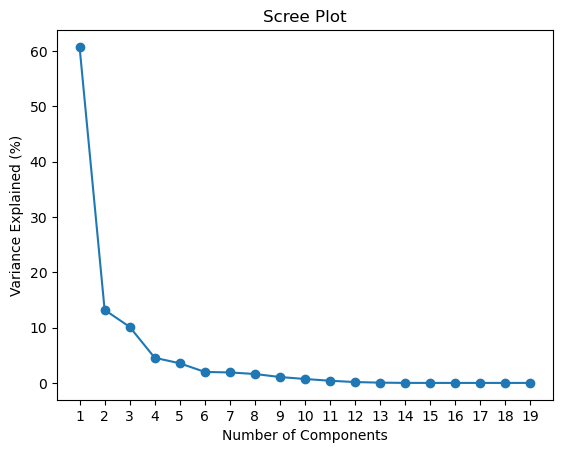

In [26]:
# Plotting the scree plot
plt.plot(range(1, len(varianceRatio) + 1), varianceRatio*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot')
plt.xticks(range(1, len(varianceRatio) + 1))
plt.show()

From scree plot and component breakdown above, seven components will explain 96% of the variance in the data. Therefore, we will go ahead reduce dimensions to 7 components. 

In [27]:
pca = PCA(n_components=7)
reduced_segData_norm = pca.fit_transform(segData_norm)
print(reduced_segData_norm)
#Transform the data into a reduced dimension space using PCA with 7 components.

[[-0.68908218  0.53295103  0.24609833 ... -0.07643294  0.0478044
  -0.04732089]
 [-0.66691952  0.51067465  0.33797172 ... -0.04117773  0.05655091
  -0.04170747]
 [-0.71202748  0.77094365 -0.15582189 ... -0.16662228  0.04381397
  -0.06069494]
 ...
 [-0.50774475 -0.12941533 -0.08224551 ... -0.02791769 -0.03189182
  -0.10525024]
 [-0.47909057 -0.08634467 -0.15871141 ...  0.00443463 -0.00371285
  -0.08505898]
 [-0.44225382 -0.10622525 -0.04712725 ...  0.01522668 -0.2061659
   0.15294393]]


#### d. Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the Completeness and Homogeneity values of the new clusters.

In [28]:
k = 7
reduced_kMeans = KMeans(n_clusters=k)
reduced_kMeans.fit(reduced_segData_norm)

KMeans(n_clusters=7)

In [29]:
print("Cluster Centroids:")
for reduced_centroid in reduced_kMeans.cluster_centers_:
    print(reduced_centroid)
    print()

Cluster Centroids:
[-0.61926803  0.64024955  0.1958285  -0.08685588 -0.06775977  0.00886611
  0.03837202]

[ 0.43588833 -0.10529857  0.1652571   0.233499   -0.04503119 -0.00727238
  0.01504941]

[-0.60370483 -0.35550285  0.10919651 -0.12979947 -0.1309111  -0.02160283
 -0.04388193]

[ 1.41452711  0.0872227   0.03676534 -0.17319537 -0.02992247 -0.00897281
 -0.02157291]

[-0.20742333 -0.24636635  0.15253216  0.05661766  0.13031089 -0.00570357
  0.03304526]

[ 0.17640392  0.04369841 -0.26537004  0.18412442  0.02707514  0.02434118
  0.00326357]

[-0.51157863 -0.06490837 -0.33614472 -0.06536523  0.07880903  0.00623993
 -0.02626065]



In [30]:
# Printing cluster centroids
print("Cluster Centroids:")
reduced_centroids = pd.DataFrame(reduced_kMeans.cluster_centers_, columns=["PCA {}".format(i+1) for i in range(reduced_segData_norm.shape[1])])
reduced_centroidsTranspose = reduced_centroids.T
reduced_centroidsTranspose.columns = ["Cluster {}".format(i+1) for i in range(len(reduced_centroidsTranspose.columns))]
reduced_centroidsTranspose

Cluster Centroids:


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
PCA 1,-0.62,0.44,-0.60,1.41,-0.21,0.18,-0.51
PCA 2,0.64,-0.11,-0.36,0.09,-0.25,0.04,-0.06
PCA 3,0.20,0.17,0.11,0.04,0.15,-0.27,-0.34
PCA 4,-0.09,0.23,-0.13,-0.17,0.06,0.18,-0.07
PCA 5,-0.07,-0.05,-0.13,-0.03,0.13,0.03,0.08
PCA 6,0.01,-0.01,-0.02,-0.01,-0.01,0.02,0.01
PCA 7,0.04,0.02,-0.04,-0.02,0.03,0.00,-0.03


In [31]:
reduced_completeness = completeness_score(segClass['Value'], reduced_kMeans.labels_)
reduced_homogeneity = homogeneity_score(segClass['Value'], reduced_kMeans.labels_)

# Print the completeness and homogeneity scores
print(f"Completeness with dimensionality reduction: {reduced_completeness}")
print(f"Homogeneity with dimensionality reduction: {reduced_homogeneity}")

Completeness with dimensionality reduction: 0.6110721173142056
Homogeneity with dimensionality reduction: 0.6094646259197861


#### e. Discuss your observations based on the comparison of the two clustering results.

In [32]:
print(f"Completeness with full normalized dataset: {completeness:.4f}")
print(f"Homogeneity with full normalized dataset: {homogeneity:.4f}")
print(f"Completeness with dimensionality reduction on normalized dataset: {reduced_completeness:.4f}")
print(f"Homogeneity with dimensionality reduction on normalized dataset: {reduced_homogeneity:.4f}")

Completeness with full normalized dataset: 0.6117
Homogeneity with full normalized dataset: 0.6100
Completeness with dimensionality reduction on normalized dataset: 0.6111
Homogeneity with dimensionality reduction on normalized dataset: 0.6095


The Completeness and Homogeneity score results are very similar before and after dimensionality reduction. From this, for dataset with large number of features, it would be more efficient to run PCA first then clustering for confirmation. This will reduce the computational complexity and improving clustering process efficiency.